# Guia 1, Parte C
## a) Solucion numerica resolviendo la ecuacion diferencial

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Definición del Potencial
def Vpot(x):
    return -1/x

In [3]:
def g(y, x, E):
    return [y[1],2*(Vpot(x)-E)*y[0]]

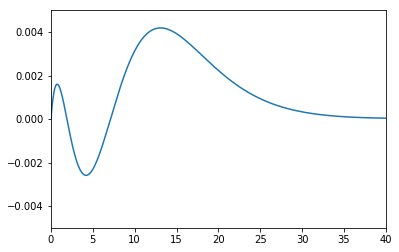

In [5]:
# Valores iniciales de phi(x) y phi’(x)
initialY = 0.0,0.005

# Valor tentativo de E
E = -0.055483

end = 40
nsize = 2000
x = np.linspace(0.001,end,nsize)

# Solucion ecuación diferencial
sol = odeint(g,initialY,x,args=(E,))

# Ploteo de solución
plt.plot(x, sol[:,0])
plt.axis([0, end, -0.005, 0.005])
#plt.plot(x,Vpot(x),color='k')
plt.show()

In [6]:
integral = np.trapz(x,sol[:,0]**2)
integral

-0.00017316323112561745

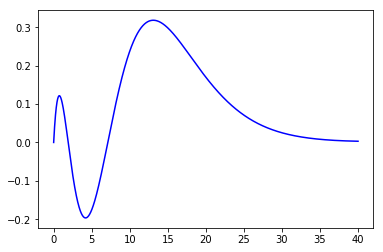

In [7]:
# Normalizacion
sol_norm = (1/np.sqrt(abs(integral))) * sol[:,0]
plt.plot(x,sol_norm,'b')
plt.show()

In [8]:
np.trapz(x,sol_norm**2)

-1.0000000000000002

## Comparacion con solucion analitica

In [9]:
# Comparando con analitica
import sympy as sp
from __future__ import division

r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
n=sp.Symbol('n',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)

def R_hyp(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * sp.factorial(n+l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,),(2*l+2,),(rho))
    R = rnorm * rfunc
    return R

In [10]:
psi_ode = np.zeros(nsize)

for i in range(nsize):
    psi_ode[i] = R_hyp(3,0,1,x[i]) # n=1; l=lq; z=lq

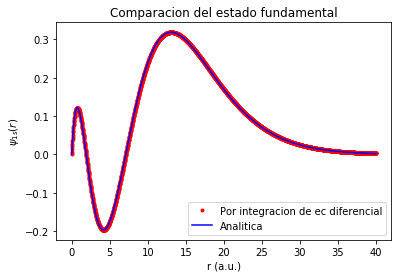

In [11]:
# Ploteo

plt.plot(x,sol_norm,'r.',label='Por integracion de ec diferencial') # Por diagonalizacion
plt.plot(x,x*psi_ode,'b',label='Analitica') # Analitica
plt.title("Comparacion del estado fundamental");
plt.xlabel("r (a.u.)");
plt.legend();
plt.ylabel("$\psi_{1s}(r)$");
plt.show()

## b) Por diagonalizacion directa

In [12]:
from numpy import diag,  linspace, array ,arange
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show
from numpy import pi,sqrt,zeros,sin,cos

    
%matplotlib inline

import time
from __future__ import division

In [13]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [14]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
    return  U

In [72]:
from numpy import diag,  linspace, array, arange, zeros
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

step = 0.1
xmin = step
xmax = 30
x = arange(xmin,xmax,step)
nsize = len(x)
 
# array defined above
nsize = len(x)
Dx = step

x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])

# Kinetic (T) and Potential (V)
lq=0
zq=1

T = -0.5*Laplacian(x)
V = -zq/x + lq*(lq+1)/(2 * x * x)

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)


# Normalization
U=Normalizate(U,x)

E0 = -0.499353539073
E1 = -0.124997485
E2 = -0.0554363155937
E3 = -0.0247850993076
E4 = 0.0128548436326


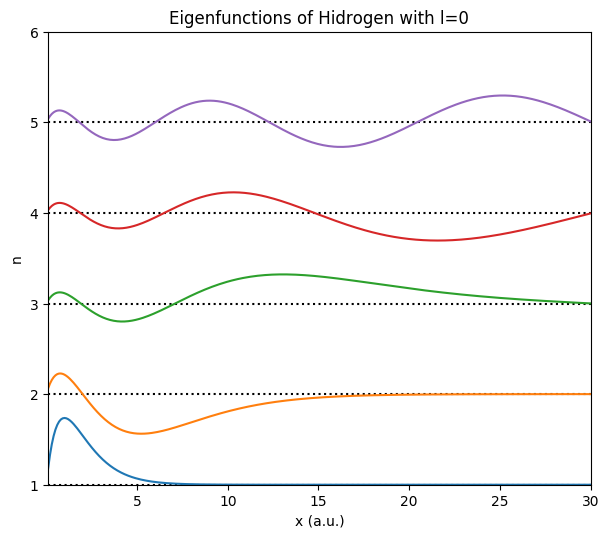

In [73]:
# Plot

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Number of functions to plot
nfunctions = 5

# Plot the potential
plot(x,V,color='k')

# Plot wavefunctions
ebase=0
for i in range(nfunctions):
    ebase=ebase+1
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function 
    # so they don't all pile up on each other:
    plot(x,U[:,i]+ebase)
    print("E{} = {}".format(i,E[i]))
axis([xmin,xmax,1,6])
title("Eigenfunctions of Hidrogen with l={}".format(lq))
xlabel("x (a.u.)")
ylabel("n")
show()

### Comparando con la solucion analitica

In [74]:
psi_diag = np.zeros(nsize)

for i in range(nsize):
    psi_diag[i] = R_hyp(3,lq,zq,x[i])

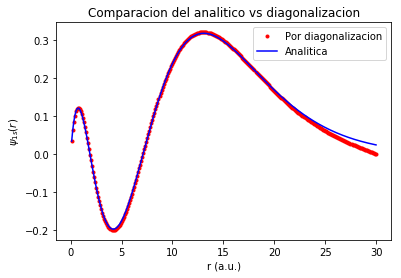

In [75]:
# Ploteo

plt.plot(x,U[:,2],'r.',label='Por diagonalizacion') # Por diagonalizacion
plt.plot(x,x*psi_diag,'b',label='Analitica') # Analitica
plt.title("Comparacion del analitico vs diagonalizacion");
plt.xlabel("r (a.u.)");
plt.legend();
plt.ylabel("$\psi_{1s}(r)$");

Caen perfectamente una arriba de la otra

## c) Solucion variacional con gaussianas

In [40]:
import numpy as np
from numpy import  linspace, zeros, array, pi
from scipy.linalg import  eigh , eigvalsh

%matplotlib inline
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure

In [41]:
nsize = 4
S = zeros((nsize,nsize))
H = zeros((nsize,nsize))
Alpha = zeros((nsize))
Ci = zeros((nsize))# Datos Iniciales para variacional

In [54]:
# Datos Iniciales para variacional
Alpha[0] = 13.00773
Alpha[1] = 1.962079
Alpha[2] = 0.444529
Alpha[3] = 0.1219492

#Alpha[0] = 0.298073
#Alpha[1] = 1.242567
#Alpha[2] = 5.782948
#Alpha[3] = 38.47497

In [55]:
# Cálculo de Overlaps  Sij=<xi|xj>

def overlap(Alpha,p,q):
    spq = ( pi / (Alpha[p] + Alpha[q]) )**(3./2.)
    return spq

for i in range(0,nsize):
    for j in range(i,nsize):        
        S[i,j] = overlap(Alpha,i,j)
        S[j,i] = S[i,j]

def gauss(Alpha, r):
    return np.exp(-Alpha*r**2)

In [56]:
 # Cálculo de Hamiltoniano Hij=<xi| H |xj>


# Cálculo de Energía Cinética  Tij=<xi|-1/2 D^2 |xj>
def Tkin(Alpha,p,q):
    rnum = 3 * pi**(3./2.) * Alpha[p] * Alpha[q]
    rden =  (Alpha[p] + Alpha[q] )**(5./2.)    
    Tpq = rnum/rden    
    return Tpq


# Cálculo de Energía Potencial  Vij=<xi|-Z/r |xj>
def Vpot(Alpha,p,q):
    Vpq = (-2*pi ) / (Alpha[p] + Alpha[q])    
    return Vpq

for i in range(0,nsize):
    for j in range(i,nsize): 
        H[i,j] = Tkin(Alpha,i,j) + Vpot(Alpha,i,j)
        H[j,i] = H[i,j]

In [57]:
# Solución generalized eigenvalues (H-ES)(C)=0
# Sólo Autovalores !

Ener = eigvalsh(H,S,type=1)
Ener

array([ -0.49927841,   0.11321392,   2.59229957,  21.14436519])

In [58]:
# Solución generalized eigenvalues (H-ES)(C)=0

Ener,coef = eigh(H,S,type=1)
Ci = coef[:,0]
Ci

array([-0.09610152, -0.16301717, -0.18558699, -0.07370076])

In [59]:
def psi(Ci,Alpha,x):
    #from math import  exp
    nsize = len(Ci) 
    sum = 0.0
    for i in range(0,nsize):
        sum = sum + Ci[i]*gauss(Alpha[i],x) #exp(-Alpha[i]*x**2)
    return sum

In [60]:
# array definitions
npts = 500
xmin = 0.0
xmax = 10.0
x = linspace(xmin,xmax,npts)
xsize = len(x)
wave1s = zeros(npts)

In [61]:
for i in range(0,npts):
        wave1s[i] = psi(-Ci,Alpha,x[i])

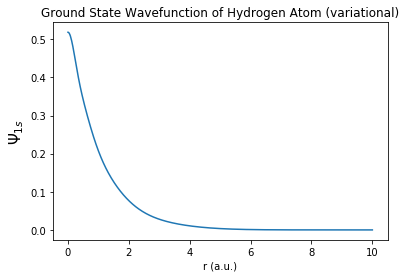

In [62]:
plot(x,wave1s);
#axis([xmin,xmax,0,0.6]);
title("Ground State Wavefunction of Hydrogen Atom (variational)");
xlabel("r (a.u.)");
ylabel("$\Psi_{1s}$",size=15);

### Comparando con solucion analitica

In [63]:
psi_ay = np.zeros(npts)

for i in range(npts):
    psi_ay[i] = R_hyp(1,0,1,x[i]) # n=1; l=lq; z=lq

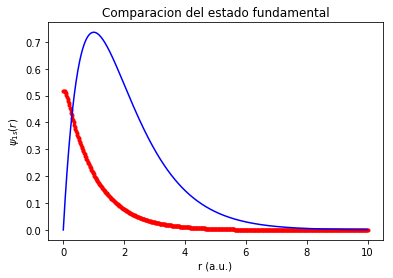

In [64]:
# Ploteo
import matplotlib.pyplot as plt

plot(x,wave1s,'r.') # Por solucion variacional
plt.plot(x,x*psi_ay,'b') # Analitica
plt.title("Comparacion del estado fundamental");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");

No coinciden